## 1. Hello World!
- TF installed
- Create a constant
- Create a session
- Use the session to run some computation

In [1]:
import tensorflow as tf
# Build a graph
hello = tf.constant('Hello, TensorFlow!')
# Launch the graph in a session
# A Session object encapsulates the env in which 
# Operation objects are executed and Tensor objects are evaluated
with tf.Session() as sess:
    # Evaluate the tensor `hello`
    print(sess.run(hello))

Hello, TensorFlow!


## 2. Linear Regression

### 2.1 Create input data
TODO: meaningful examples for x_data and y_data
http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

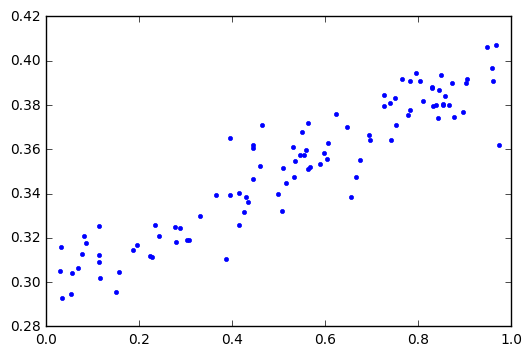

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create input data using NumPy: y = x * 0.1 + 0.3 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

# Plot input data.
plt.plot(x_data, y_data, '.')

### 2.1 Perform linear regression with Tensorflow

In [3]:
# Step 1a: Build inference graph 
# Create variables w and b that compute y_data = w * x_data + b
# Generate tensors with shape [1] and values in range [0.0, 1.0] with a uniform distribution
w = tf.Variable(tf.random_uniform([1], 0.0, 1.0), name="weights") 
# Create a tensor with shape [1] and all elements set to zero
b = tf.Variable(tf.zeros([1]), name="biases")
y = w * x_data + b

In [4]:
# Step 1b: Build training graph
# Create an op that calculates loss
loss = tf.reduce_mean(tf.square(y - y_data))  
# Create an optimizer with learning_rate=0.5
optimizer = tf.train.AdamOptimizer(0.5)  
# Create an op that minimizes loss
train = optimizer.minimize(loss)  
# Create an op initializes all the variables
init = tf.initialize_all_variables()  

In [5]:
# Step 2: Create a session, launch the graph and perform traning
with tf.Session() as sess:
    sess.run(init) # Execute the op `init`
    # Save initial values of y for plotting
    y_initial = sess.run(y) # Evaluate the tensor `y` 
    
    for step in range(201):
        sess.run(train) # Execute the op `train`         
        if step % 50 == 0:
            print('Step:', step, 'w:', sess.run(w), 'b:', sess.run(b))
    
    # Save predicted values of y for plotting
    y_predicted = sess.run(y)

('Step:', 0, 'w:', array([ 0.25765684], dtype=float32), 'b:', array([-0.49999845], dtype=float32))
('Step:', 50, 'w:', array([ 0.11187194], dtype=float32), 'b:', array([ 0.24690711], dtype=float32))
('Step:', 100, 'w:', array([ 0.09895109], dtype=float32), 'b:', array([ 0.2978349], dtype=float32))
('Step:', 150, 'w:', array([ 0.10159824], dtype=float32), 'b:', array([ 0.29839748], dtype=float32))
('Step:', 200, 'w:', array([ 0.10132702], dtype=float32), 'b:', array([ 0.29827708], dtype=float32))


### 2.3 Visualize the result

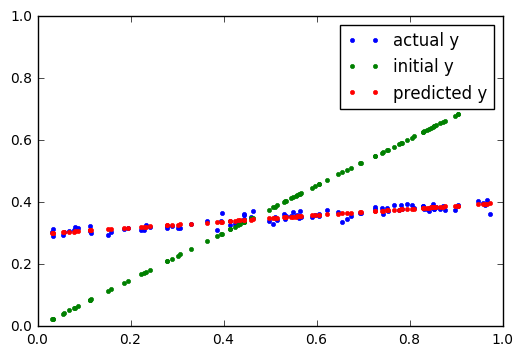

In [6]:
plt.plot(x_data, y_data, '.', label="actual y")
plt.plot(x_data, y_initial, ".", label="initial y")
plt.plot(x_data, y_predicted, ".", label="predicted y")
plt.ylim(0, 1.0)
plt.legend()

## References
- https://github.com/sherrym/tf-tutorial